Enter Email for Analysis:phillip.allen@enron.com
Analysis for:  phillip.allen@enron.com


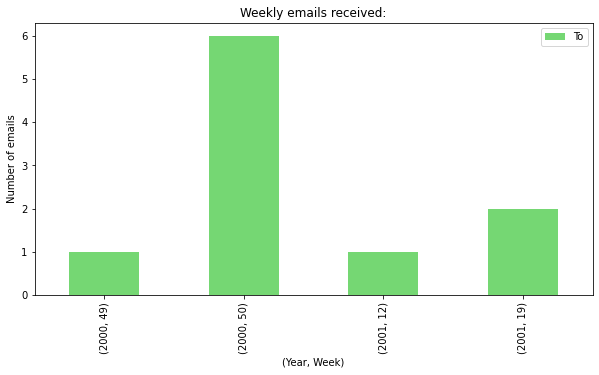

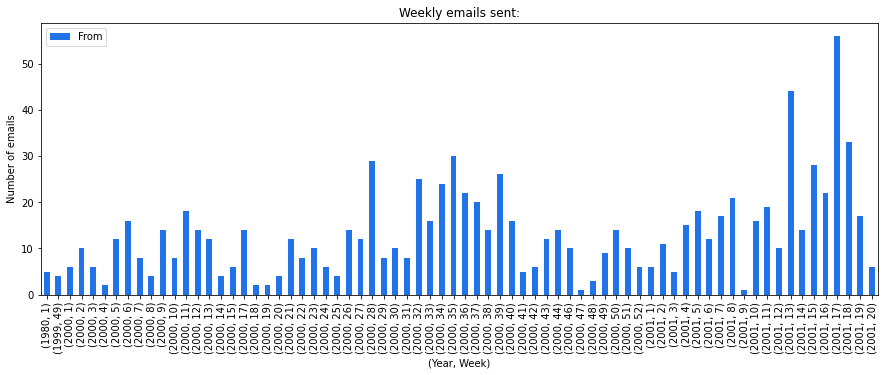

In [344]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
from matplotlib import pyplot as plt

df = pd.read_csv("enron_test.csv") 
df["new_date"] = df["new_date"].astype("datetime64")

email = input("Enter Email for Analysis:")
# email = 'phillip.allen@enron.com'
from_filter = df['From'].apply(lambda x: email in str(x))
to_filter = df['To'].apply(lambda x: email in str(x))


to_filtered_data = df.loc[to_filter][['To']]
from_filtered_data = df.loc[from_filter][['From']]

print("Analysis for: ", email)
if to_filtered_data.size > 0:
  to_filtered_data.groupby([df["new_date"].dt.year, df["new_date"].dt.isocalendar().week]).count().plot(kind="bar", figsize=(10,5), color='#75d773', title = "Weekly emails received:", xlabel = '(Year, Week)', ylabel = 'Number of emails')
else:
  print("NO emails received!")


if from_filtered_data.size > 0:
  from_filtered_data.groupby([df["new_date"].dt.year, df["new_date"].dt.isocalendar().week]).count().plot(kind="bar", figsize=(15,5), color='#2173e7', title = "Weekly emails sent:", xlabel = '(Year, Week)', ylabel = 'Number of emails')
else:
  print("NO emails sent!")

Top 50 Keywords in received email with score: 
(9.0, 'whole thing late')
(9.0, 'west gas originations')
(9.0, 'we still haven')
(9.0, 'time tomorrow as')
(9.0, 'susan j mara')
(9.0, 'steven j kean')
(9.0, 'rebecca w cantrell')
(9.0, 'particuarly since this')
(9.0, 'jane m tholt')
(9.0, 'james d steffes')
(9.0, 'denver piece combined')
(9.0, 'dc 20006 phone')
(8.75, 'pivot at 795')
(8.75, 'pivot at 50')
(8.75, 'my stab at')
(8.666666666666666, 'provide you with')
(8.666666666666666, 'apparently on such')
(8.6, 'primary objectives of')
(8.6, 'note of caution')
(8.6, 'lot of guesswork')
(8.6, 'ballpark of reality')
(8.5, 'tiffany miller 5')
(8.5, 'richard b sanders')
(8.5, 'as prices rose')
(8.428571428571429, '32 pm to')
(8.333333333333334, 'pivot table for')
(8.333333333333334, 'meeting with staff')
(8.333333333333334, 'emissions strategy meeting')
(8.25, 'phillip k allen')
(8.166666666666666, 'information you have')
(8.095238095238095, 'on december 12')
(8.0, 'please give me')
(8.0, 'n

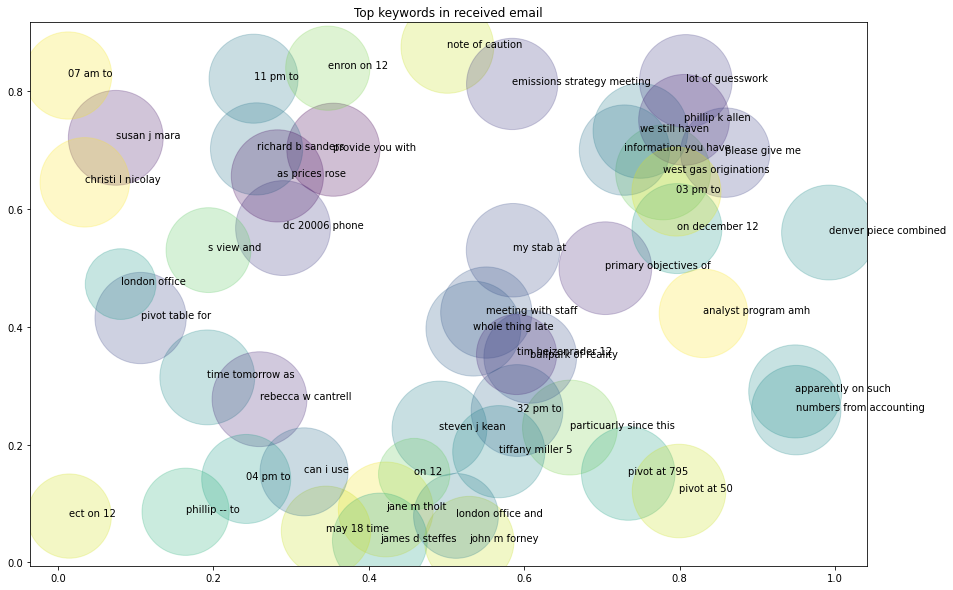

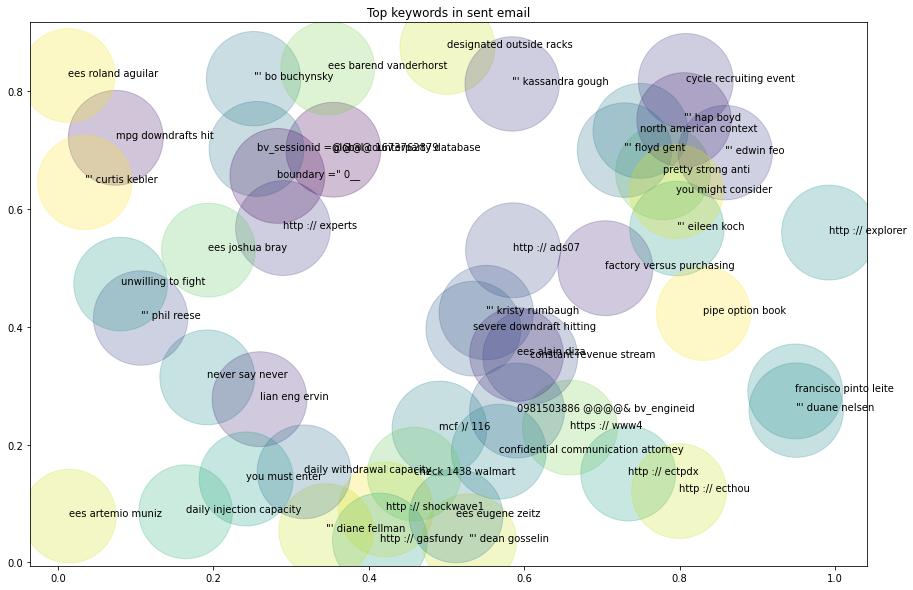

In [350]:
# %pip install rake-nltk
# %%python -c "import nltk; nltk.download('stopwords')"
import numpy as np
from rake_nltk import Metric, Rake

to_filtered_data = df.loc[to_filter][['content']]
from_filtered_data = df.loc[from_filter][['content']]

print("Top 50 Keywords in received email with score: ")
r = Rake(min_length=1, max_length=3, stopwords=["\/","@",":","the", "an", "a", "is","/?", "=", "<", ">,", "\\", "\"", "com", "\n", "----------------------", "---------------------------"])
r.extract_keywords_from_sentences(to_filtered_data["content"])
received_keywords = r.get_ranked_phrases_with_scores()[0:50]
print("\n".join([str(line) for line in received_keywords]))

print("\nTop 50 Keywords in sent email with score: ")
r.extract_keywords_from_sentences(from_filtered_data["content"])
sent_keywords = r.get_ranked_phrases_with_scores()[0:50]
print("\n".join([str(line) for line in sent_keywords]))

# create data
x = np.random.rand(50)
y = np.random.rand(50)
zi = list(reversed(range(51)))[0:50]
#scatter plot size based on keyword score
size = [kw[0]*1000 for kw in received_keywords]

colors = np.random.rand(50)
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y, s=size,c=colors, alpha=0.25)
ax.set_title("Top keywords in received email")

for i, txt in enumerate(received_keywords):
    ax.annotate(txt[1], (x[i], y[i]))


size = [kw[0]*1000 for kw in sent_keywords]
fig2, ax2 = plt.subplots(figsize=(15,10))
ax2.scatter(x, y, s=size,c=colors, alpha=0.25)
ax2.set_title("Top keywords in sent email")

for i, txt in enumerate(sent_keywords):
    ax2.annotate(txt[1], (x[i], y[i]))

plt.show()

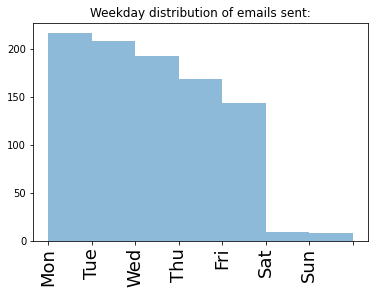

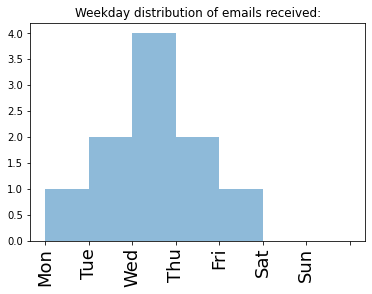

In [351]:
import functools 

weekday_received_data = df.loc[to_filter]['new_date'].apply(lambda x: x.weekday())
weekday_sent_data = df.loc[from_filter]['new_date'].apply(lambda x: x.weekday())

# weekday_sent_data.plot.hist(bins=[0,1,2,3,4,5,6,7], alpha=0.5, x = [6,5,4,5,6,7,8])
fig3, ax3 = plt.subplots()
ax3.hist(weekday_sent_data, alpha=0.5, bins=[0,1,2,3,4,5,6,7])
weekdays = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
# Set number of ticks for x-axis
ax3.set_xticks([0,1,2,3,4,5,6,7])
# Set ticks labels for x-axis
ax3.set_xticklabels(weekdays, rotation='vertical', fontsize=18)
# weekday_received_data.plot.hist(bins=[0,1,2,3,4,5,6,7], alpha=0.5)
ax3.set_title("Weekday distribution of emails sent:")

fig4, ax4 = plt.subplots()
ax4.hist(weekday_received_data, alpha=0.5, bins=[0,1,2,3,4,5,6,7])
weekdays = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
# Set number of ticks for x-axis
ax4.set_xticks([0,1,2,3,4,5,6,7])
# Set ticks labels for x-axis
ax4.set_xticklabels(weekdays, rotation='vertical', fontsize=18)
ax4.set_title("Weekday distribution of emails received:")

plt.show()